###  Training a Random Forest Classifier


In [61]:
from sklearn import datasets
from sklearn.preprocessing import StandardScaler 
import matplotlib.pyplot as plt
from numpy import random, float
import numpy as np
%matplotlib inline


iris = datasets.load_iris()
features = iris.data
scaler = StandardScaler()
features_std = scaler.fit_transform(features)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(features_std, iris.target, test_size=.25, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestClassifier
# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) # Train model
model = randomforest.fit(xtrain, ytrain)

In [59]:
y_pred=model.predict(xtest)
from sklearn import metrics
print(metrics.accuracy_score(ytest, y_pred))

0.9736842105263158


### Training a Random Forest Regressor

In [55]:
from sklearn.ensemble import RandomForestRegressor
# Create random forest classifier object
randomforest = RandomForestRegressor(random_state=0, n_jobs=-1) # Train model
model = randomforest.fit(xtrain, ytrain)

###  Identifying Important Features in Random Forests

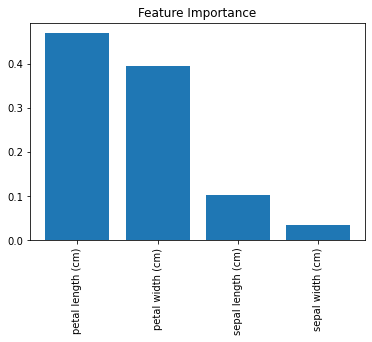

In [56]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier 

# Create random forest classifier object
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1) # Train model
model = randomforest.fit(xtrain, ytrain) # Calculate feature importances
importances = model.feature_importances_
# Sort feature importances in descending order
indices = np.argsort(importances)[::-1]
# Rearrange feature names so they match the sorted feature importances
names = [iris.feature_names[i] for i in indices] # Create plot
plt.figure()
# Create plot title
plt.title("Feature Importance") # Add bars
plt.bar(range(features.shape[1]), importances[indices]) # Add feature names as x-axis labels
plt.xticks(range(features.shape[1]), names, rotation=90) # Show plot
plt.show()

### Selecting Important Features in Random Forests

In [13]:
# Load libraries

from sklearn.ensemble import RandomForestClassifier 
from sklearn import datasets
from sklearn.feature_selection import SelectFromModel

# Create random forest classifier
randomforest = RandomForestClassifier(random_state=0, n_jobs=-1)
# Create object that selects features with importance greater # than or equal to a threshold
selector = SelectFromModel(randomforest, threshold=0.3)
# Feature new feature matrix using selector
features_important = selector.fit_transform(xtrain, ytrain) # Train random forest using most important featres
model = randomforest.fit(features_important, ytrain)

### Controlling Tree Size

In [15]:
from sklearn.tree import DecisionTreeClassifier
decisiontree = DecisionTreeClassifier(random_state=0,
                                          max_depth=None,
                                          min_samples_split=2,
                                          min_samples_leaf=1,
                                          min_weight_fraction_leaf=0,
                                          max_leaf_nodes=None,
                                          min_impurity_decrease=0)
# Train model
model = decisiontree.fit(xtrain, ytrain)